In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings(ignore='all')

In [2]:
train=pd.read_csv('loan_data_train.csv')
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [3]:
train.shape

(2200, 15)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

# check the numerical column and object

In [5]:
train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [6]:
train

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


In [7]:
test=pd.read_csv('loan_data_test.csv')
test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [8]:
test.dtypes

ID                                  int64
Amount.Requested                    int64
Amount.Funded.By.Investors         object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance            int64
Inquiries.in.the.Last.6.Months      int64
Employment.Length                  object
dtype: object

In [9]:
print(test.shape)
print(train.shape)

(300, 14)
(2200, 15)


# Data Dictionary

In [10]:
# - It is the metadata= Data about the data
# - It has description about the data.

# Problem statement

In [11]:
# - What is the objective of the modelling
# - Predict the Interest rate (Interset Rate is the Target column)

# Sanity check

In [12]:
# Whether I have sufficient data or not or how much training data I have

In [13]:
train.shape, test.shape

((2200, 15), (300, 14))

In [14]:
# trainig data= features+target
# test data=features

# EDA (Exploratory data analysis)

# Missing value

In [15]:
train.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [16]:
# we have some missing value
# Identify the non-numeric column

In [17]:
train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [18]:
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [19]:
train['FICO.Range']

0       720-724
1       710-714
2       690-694
3       710-714
4       730-734
         ...   
2195    675-679
2196    700-704
2197    675-679
2198    670-674
2199    710-714
Name: FICO.Range, Length: 2200, dtype: object

In [20]:
# amount requested - convert into numerical
# amount funded by investors - convert into numerical
# interest rate- Remove the % sign and convert into numerical
# Loan lenght- Categorical column
# Loan purpose-object
# Debt to income ratio- Remove the % sign and convert into numerical
# State- Drop
# Home ownership- object
# FICO- Risk Indicator (Important)- Take the mean of the range and convert to numeric
# Open Credit lines- Convert to Numeric (continuous/category)
# Revolving credit scores- Convert to Numeric
# Employment Length- Categorical column
# Inquiries in the Last 6 Months- Doesn't seem to have any impact on target column so drop it
# Employment Length- Categorical

# Preprocessing

In [21]:
# First combine the train and test data , after that start the preprocessing
# drop the Id column,inquired in the last 6 months and state column
# Before modeling we will again split the dataset into train and test and will train the model on traininig data only

In [22]:
train.shape  ,  test.shape

((2200, 15), (300, 14))

In [23]:
test.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Loan.Length',
       'Loan.Purpose', 'Debt.To.Income.Ratio', 'State', 'Home.Ownership',
       'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [24]:
train.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [25]:
# Replaceing the '.' with '_' in train data
train.columns=train.columns.str.replace('.','_')

C:\Users\shada\AppData\Local\Temp\ipykernel_8656\590839366.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train.columns=train.columns.str.replace('.','_')


In [26]:
train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [27]:
# Replaceing the '.' with '_' in test data
test.columns=test.columns.str.replace('.','_')

C:\Users\shada\AppData\Local\Temp\ipykernel_8656\3040375624.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test.columns=test.columns.str.replace('.','_')


In [28]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [29]:
# Note: before comebine the data table, both columns should be same else we won't able to combine

In [30]:
# Need to add one column in test data
train.shape,test.shape

((2200, 15), (300, 14))

In [31]:
# Adding the  interest_rate column and value will be null in test data
test['Interest_Rate']=np.nan;

In [32]:
test.head()
#test.shape

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,NaN
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,NaN
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,NaN
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,NaN
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,NaN


In [33]:
train['Data_type']='Train'
test['Data_type']='Test'

In [34]:
train.shape,test.shape

((2200, 16), (300, 16))

In [35]:
# 14 features + 1 target + 1 placeholder

# Combining the train and test data

In [36]:
df=pd.concat((train,test),ignore_index=True)

In [37]:
df.shape

(2500, 16)

In [38]:
df

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24675.0,12000,11975,NaN,60 months,home_improvement,13.91%,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,Test
2496,69456.0,5000,5000,NaN,36 months,debt_consolidation,17.22%,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,Test
2497,97954.0,4375,4375,NaN,36 months,credit_card,9.09%,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,Test
2498,36931.0,13600,13600,NaN,60 months,credit_card,12.85%,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,Test


# Amount_Requested and Amount_Funded_By_Investors numerical

In [39]:
df['Amount_Requested']=pd.to_numeric(df['Amount_Requested'],errors='coerce')

In [40]:
df['Amount_Requested'].dtype

dtype('float64')

In [41]:
df['Amount_Funded_By_Investors']=pd.to_numeric(df['Amount_Funded_By_Investors'],errors='coerce')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2495 non-null   float64
 2   Amount_Funded_By_Investors      2495 non-null   float64
 3   Interest_Rate                   2200 non-null   object 
 4   Loan_Length                     2499 non-null   object 
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2497 non-null   float64
 10  FICO_Range                      2500 non-null   object 
 11  Open_CREDIT_Lines               2496 non-null   object 
 12  Revolving_CREDIT_Balance        24

In [43]:
# Interest_rate and debt_to_income_ratio change the datatypes into float


In [44]:
c=['Interest_Rate','Debt_To_Income_Ratio'];
for i in c:
    df[i]=df[i].str.replace('%','').astype(float)

In [45]:
df

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type
0,79542.0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24675.0,12000.0,11975.00,NaN,60 months,home_improvement,13.91,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,Test
2496,69456.0,5000.0,5000.00,NaN,36 months,debt_consolidation,17.22,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,Test
2497,97954.0,4375.0,4375.00,NaN,36 months,credit_card,9.09,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,Test
2498,36931.0,13600.0,13600.00,NaN,60 months,credit_card,12.85,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,Test


# Loan length- Categorical column

In [46]:
df.Loan_Length.value_counts()

36 months    1950
60 months     548
.               1
Name: Loan_Length, dtype: int64

In [47]:
# one hot coding and level coding 

In [48]:
df.Loan_Length.replace('.','36 months',inplace=True)

In [49]:
df.Loan_Length.value_counts(dropna=False)

36 months    1951
60 months     548
NaN             1
Name: Loan_Length, dtype: int64

In [50]:
df.Loan_Length.unique()

array(['60 months', '36 months', nan], dtype=object)

In [51]:
df.columns

Index(['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'Data_type'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

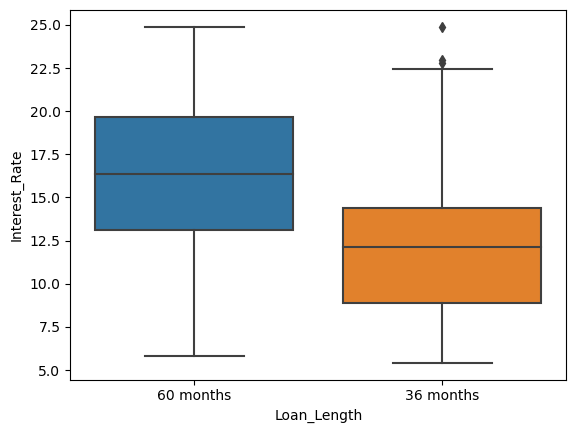

In [52]:
sns.boxplot(x=df[df.Data_type=='Train']['Loan_Length'],y=df[df.Data_type=='Train']['Interest_Rate'])
plt.show

In [53]:
# We should go for Label Encoding
# 36 Months- 0
# 60 Months- 1

In [54]:
df

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type
0,79542.0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24675.0,12000.0,11975.00,NaN,60 months,home_improvement,13.91,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,Test
2496,69456.0,5000.0,5000.00,NaN,36 months,debt_consolidation,17.22,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,Test
2497,97954.0,4375.0,4375.00,NaN,36 months,credit_card,9.09,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,Test
2498,36931.0,13600.0,13600.00,NaN,60 months,credit_card,12.85,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,Test


In [55]:
df.Loan_Length=df.Loan_Length.apply(lambda x:0 
                                    if x=='36 months'
                                    else 1)

In [56]:
df.Loan_Length

0       1
1       1
2       0
3       0
4       1
       ..
2495    1
2496    0
2497    0
2498    1
2499    0
Name: Loan_Length, Length: 2500, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2495 non-null   float64
 2   Amount_Funded_By_Investors      2495 non-null   float64
 3   Interest_Rate                   2200 non-null   float64
 4   Loan_Length                     2500 non-null   int64  
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2499 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2497 non-null   float64
 10  FICO_Range                      2500 non-null   object 
 11  Open_CREDIT_Lines               2496 non-null   object 
 12  Revolving_CREDIT_Balance        24

#  Loan_Purpose

In [58]:
df.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [59]:
df

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type
0,79542.0,25000.0,25000.00,18.49,1,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,1,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,0,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,1,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24675.0,12000.0,11975.00,NaN,1,home_improvement,13.91,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,Test
2496,69456.0,5000.0,5000.00,NaN,0,debt_consolidation,17.22,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,Test
2497,97954.0,4375.0,4375.00,NaN,0,credit_card,9.09,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,Test
2498,36931.0,13600.0,13600.00,NaN,1,credit_card,12.85,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,Test


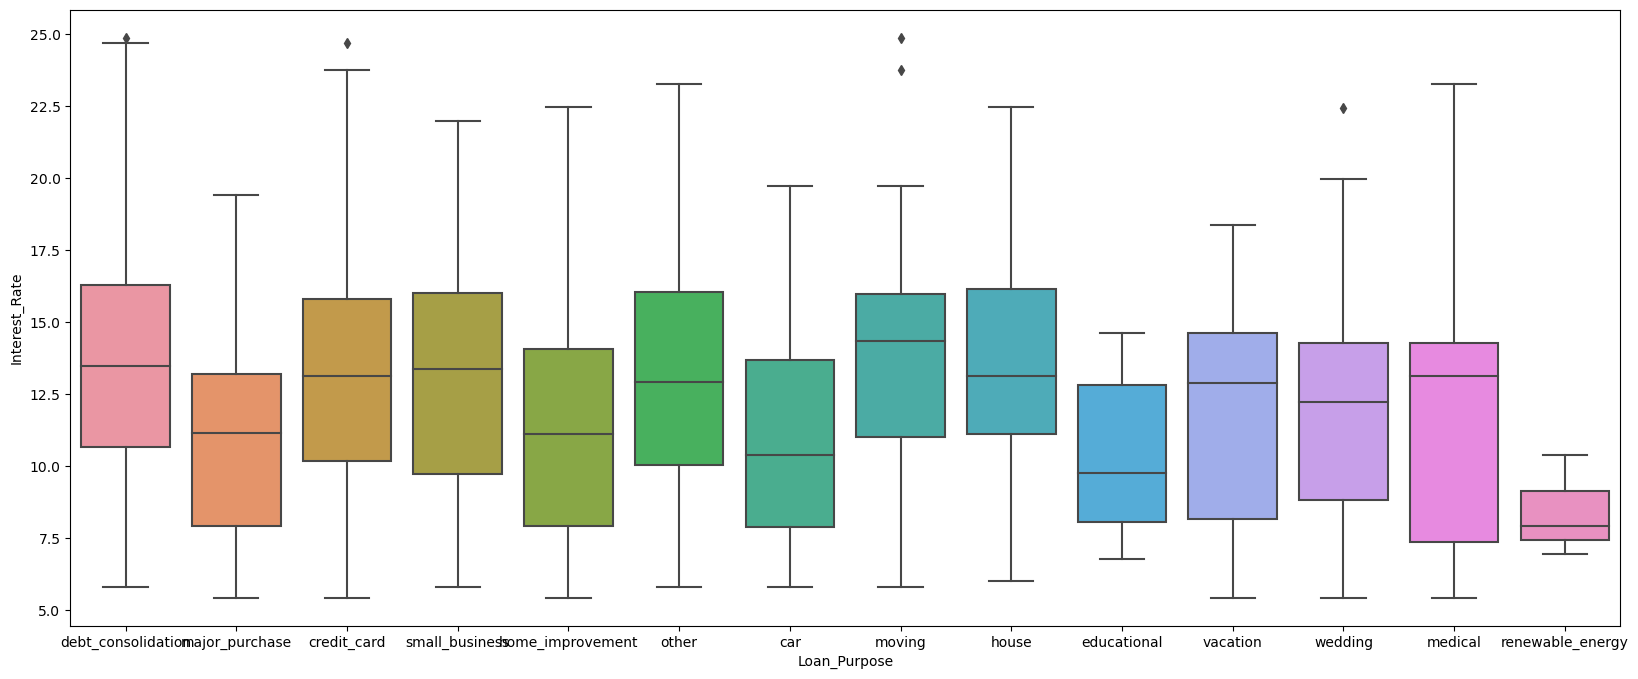

In [60]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df[df.Data_type=='Train']['Loan_Purpose'],y=df[df.Data_type=='Train']['Interest_Rate'],order=None)
plt.show()

In [61]:
df[df.Data_type=='Train']['Loan_Purpose'].unique()

array(['debt_consolidation', 'major_purchase', 'credit_card',
       'small_business', 'home_improvement', 'other', 'car', 'moving',
       'house', 'educational', 'vacation', 'wedding', 'medical', nan,
       'renewable_energy'], dtype=object)

# Target Guided Lebel encoding

In [62]:
cols=list(df[df.Data_type=='Train'].groupby('Loan_Purpose').Interest_Rate.var().sort_values().index)
cols

['renewable_energy',
 'educational',
 'major_purchase',
 'car',
 'wedding',
 'vacation',
 'credit_card',
 'debt_consolidation',
 'home_improvement',
 'other',
 'small_business',
 'medical',
 'house',
 'moving']

In [63]:
d={}
for i in range(1,len(cols)):
    d[cols[i]]=i
print(d)

{'educational': 1, 'major_purchase': 2, 'car': 3, 'wedding': 4, 'vacation': 5, 'credit_card': 6, 'debt_consolidation': 7, 'home_improvement': 8, 'other': 9, 'small_business': 10, 'medical': 11, 'house': 12, 'moving': 13}


In [64]:
df.Loan_Purpose.replace(d,inplace=True)

In [65]:
df

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type
0,79542.0,25000.0,25000.00,18.49,1,7,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,1,7,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,0,2,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,0,6,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,1,6,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,24675.0,12000.0,11975.00,NaN,1,8,13.91,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,Test
2496,69456.0,5000.0,5000.00,NaN,0,7,17.22,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,Test
2497,97954.0,4375.0,4375.00,NaN,0,6,9.09,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,Test
2498,36931.0,13600.0,13600.00,NaN,1,6,12.85,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,Test


In [66]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_type                          object
dtype: object

In [67]:
df[df.Loan_Purpose=='renewable_energy']

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type
734,33208.0,4700.0,4700.0,7.90,0,renewable_energy,10.65,OR,RENT,3416.67,760-764,3,2297,0.0,10+ years,Train
788,16487.0,1000.0,750.0,10.36,0,renewable_energy,0.00,GA,MORTGAGE,1800.00,730-734,2,0,1.0,< 1 year,Train
1211,22858.0,8400.0,8400.0,6.92,0,renewable_energy,13.30,MD,RENT,3000.00,745-749,9,6998,1.0,1 year,Train
2233,87119.0,4000.0,4000.0,NaN,0,renewable_energy,22.74,MD,RENT,1666.67,665-669,7,278,0.0,3 years,Test


In [68]:
df.Loan_Purpose.value_counts()

7                   1307
6                    444
9                    200
8                    152
2                    101
10                    87
3                     50
4                     39
11                    30
13                    29
5                     21
12                    20
1                     15
renewable_energy       4
Name: Loan_Purpose, dtype: int64

In [69]:
df.Loan_Purpose.replace('renewable_energy',1,inplace=True)

In [70]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_type                          object
dtype: object

# Home ownership

In [71]:
df.Home_Ownership.value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [72]:
df[df.Data_type=='Train']['Home_Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home_Ownership, dtype: int64

<Axes: xlabel='Home_Ownership', ylabel='Interest_Rate'>

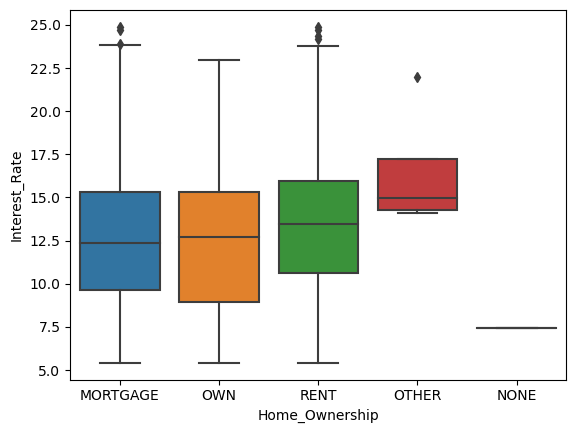

In [73]:
sns.boxplot(x=df[df.Data_type=='Train']['Home_Ownership'],y=df[df.Data_type=='Train']['Interest_Rate'])

In [74]:
df.Home_Ownership.replace({'OTHER':'RENT','NONE':'RENT'},inplace=True)

In [75]:
df.Home_Ownership.value_counts()

RENT        1152
MORTGAGE    1147
OWN          200
Name: Home_Ownership, dtype: int64

In [76]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_type                          object
dtype: object

# On hot Encoding in Home Ownership

In [77]:
df=pd.get_dummies(df,columns=['Home_Ownership'],prefix='H')

In [78]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_type,H_MORTGAGE,H_OWN,H_RENT
0,79542.0,25000.0,25000.00,18.49,1,7.0,27.56,VA,8606.56,720-724,11,15210,3.0,5 years,Train,1,0,0
1,75473.0,19750.0,19750.00,17.27,1,7.0,13.39,NY,6737.50,710-714,14,19070,3.0,4 years,Train,1,0,0
2,67265.0,2100.0,2100.00,14.33,0,2.0,3.50,LA,1000.00,690-694,13,893,1.0,< 1 year,Train,0,1,0
3,80167.0,28000.0,28000.00,16.29,0,6.0,19.62,NV,7083.33,710-714,12,38194,1.0,10+ years,Train,1,0,0
4,17240.0,24250.0,17431.82,12.23,1,6.0,23.79,OH,5833.33,730-734,6,31061,2.0,10+ years,Train,1,0,0


# FICO_Range

In [79]:
df.FICO_Range

0       720-724
1       710-714
2       690-694
3       710-714
4       730-734
         ...   
2495    705-709
2496    705-709
2497    670-674
2498    675-679
2499    675-679
Name: FICO_Range, Length: 2500, dtype: object

In [80]:
fico=df.FICO_Range.str.split('-',expand=True)
fico.columns=['Min','Max']
fico=fico.astype(int)
fico.dtypes

Min    int32
Max    int32
dtype: object

In [81]:
df.FICO_Range=(fico.Min+fico.Max)/2

In [82]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_type                          object
H_MORTGAGE                          uint8
H_OWN                               uint8
H_RENT                              uint8
dtype: object

# Open_credit_lines

In [83]:
df.Open_CREDIT_Lines.unique()

array(['11', '14', '13', '12', '6', '2', '5', '24', '7', '10', '8', '4',
       '15', '17', '18', '9', '20', '16', '3', '.', '19', '23', nan, '21',
       '26', '22', '25', '31', '34', '38', '36'], dtype=object)

In [84]:
df.Open_CREDIT_Lines=pd.to_numeric(df.Open_CREDIT_Lines,errors='coerce')

In [85]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_type                          object
H_MORTGAGE                          uint8
H_OWN                               uint8
H_RENT                              uint8
dtype: object

# Revolving_CREDIT_Balance   

In [86]:
df.Revolving_CREDIT_Balance.unique()  

array(['15210', '19070', '893', ..., 6944, 24383, 14422], dtype=object)

In [87]:
df.Revolving_CREDIT_Balance=pd.to_numeric(df.Revolving_CREDIT_Balance,errors='coerce')

In [88]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_type                          object
H_MORTGAGE                          uint8
H_OWN                               uint8
H_RENT                              uint8
dtype: object

In [90]:
df.Employment_Length.value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment_Length, dtype: int64

In [95]:
df.Employment_Length.replace({'.':'10+ years','< 1 year':0.5},inplace=True)

In [96]:
df.Employment_Length.value_counts()

10+ years    655
0.5          249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
Name: Employment_Length, dtype: int64